# Do-It-Yourself

In this section, we are going to try 

In [28]:
import geopandas
import contextily
from pysal.lib import examples

## Task I: NYC tracts

In this task we will explore contiguity weights.To do it, we will load Census tracts for New York City. Census tracts are the geography the US Census Burearu uses for areas around 4,000 people. We will use a dataset prepared as part of the [PySAL examples](https://pysal.org/libpysal/tutorial.html?highlight=examples#example-datasets). Geographically, this is a set of polygons that cover all the area of the city of New York.

A bit of info on the dataset:

In [3]:
examples.explain("NYC Socio-Demographics")

To check out the location of the files that make up the dataset, we can load it with `load_example` and inspect with `get_file_list`:

In [6]:
# Load example (this automatically downloads if not available)
nyc_data = examples.load_example("NYC Socio-Demographics")
# Print the paths to all the files in the dataset
nyc_data.get_file_list()

['/home/jovyan/pysal_data/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.prj',
 '/home/jovyan/pysal_data/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.dbf',
 '/home/jovyan/pysal_data/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.dbf',
 '/home/jovyan/pysal_data/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.shp',
 '/home/jovyan/pysal_data/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.shx',
 '/home/jovyan/pysal_data/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.prj',
 '/home/jovyan/pysal_data/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.shp',
 '/home/jovyan/pysal_data/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.shx']

And let's read the shapefile:

<AxesSubplot:>

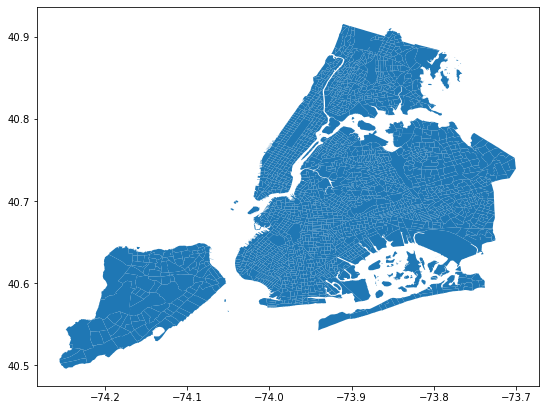

In [13]:
nyc = geopandas.read_file(nyc_data.get_path("NYC_Tract_ACS2008_12.shp"))
nyc.plot(figsize=(9, 9))

Now with the `nyc` object ready to go, here a few tasks for you to complete:

- Create a contiguity matrix using the queen criterion
- Let's focus on [Central Park](https://en.wikipedia.org/wiki/Central_Park). The corresponding polygon is ID `142`. *How many neighbors does it have?*
- Try to reproduce the {ref}`zoom plot in the previous section<lab_E:queen_zoom>`.
- Create a block spatial weights matrix where every tract is connected to other tracts in the same borough. For that, use the `boroct2010` column of the `nyc` table.
- Compare the number of neighbors by tract for the two weights matrices, *which one has more? why?*

## Task II: 

## Task III: Spatial Lag

```{margin}
Check out the notes on how to read the AHAH dataset on the {ref}`DIY section of block D <diy_D:ahah>` to refresh your mind before starting the task.
```
For this task, we will rely on the AHAH dataset. Create the spatial lag of the overall score, and generate a Moran plot. *Can you tell any overall pattern? What do you think it means?*

---

**[Optional exercise]**

Explore the help for functions `weights.DistanceBand.from_array` and try to use them to replicate `w_dist1kmB` and `w_dist1kmC`.

---

---

**[Optional extension. Lecture figure]**

Below is how to build a visualization for distance-based weights that displays the polygons, highlighting the focus and its neighbors, and then overlays the centroids and the buffer used to decide whether a polygon is a neighbor or not. Since this is distance-based weights, there needs to be a way to establish distance between two polygons and, in this case, the distance between their centroids is used.

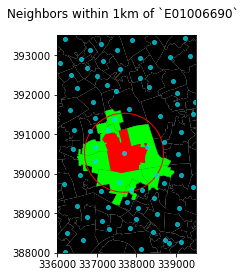

In [29]:
# Setup figure
f, ax = plt.subplots(1, figsize=(4, 4))
# Plot base layer of polygons
imd.plot(ax=ax, facecolor='k', linewidth=0.1)
# Select focal polygon
# NOTE we pass both the area code and the column name
#      (`geometry`) within brackets!!!
focus = imd.loc[['E01006690'], ['geometry']]
# Plot focal polygon
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)
# Plot neighbors
neis = imd.loc[w_dist1kmC['E01006690'], :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)
# Plot 1km buffer
buf = focus.centroid.buffer(1000)
buf.plot(edgecolor='red', facecolor='none', ax=ax)
# Plot centroids of neighbor
pts = np.array([(pt.x, pt.y) for pt in imd.centroid])
ax.plot(pts[:, 0], pts[:, 1], color='#00d8ea', 
        linewidth=0, alpha=0.75, marker='o', markersize=4)
# Title
f.suptitle("Neighbors within 1km of `E01006690`")
# Style, zoom and display on screen
ax.set_ylim(388000, 393500)
ax.set_xlim(336000, 339500)
plt.show()

---